In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('smoke_detection_iot.csv')
df


,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [3]:
print(df.isna().sum())
print(df.isnull().any())

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64
Unnamed: 0        False
UTC               False
Temperature[C]    False
Humidity[%]       False
TVOC[ppb]         False
eCO2[ppm]         False
Raw H2            False
Raw Ethanol       False
Pressure[hPa]     False
PM1.0             False
PM2.5             False
NC0.5             False
NC1.0             False
NC2.5             False
CNT               False
Fire Alarm        False
dtype: bool


In [4]:
df.nunique()

Unnamed: 0        62630
UTC               62630
Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
CNT               24994
Fire Alarm            2
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
for i in df.columns:
    if(df[i].dtype=='int64'):
        df[i]=df[i].astype('int16')
    else:
        continue
df.dtypes

Unnamed: 0          int16
UTC                 int16
Temperature[C]    float64
Humidity[%]       float64
TVOC[ppb]           int16
eCO2[ppm]           int16
Raw H2              int16
Raw Ethanol         int16
Pressure[hPa]     float64
PM1.0             float64
PM2.5             float64
NC0.5             float64
NC1.0             float64
NC2.5             float64
CNT                 int16
Fire Alarm          int16
dtype: object

In [8]:
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,66.918458,340.616845,15.970424,48.539499,740.790915,637.582660,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,19349.206336,18837.395952,14.359576,8.865367,2558.384531,1756.068805,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-32768.000000,-32768.000000,-22.010000,10.740000,-32732.000000,-32558.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-17110.750000,-14092.750000,10.994250,47.530000,113.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1452.500000,-2933.500000,20.130000,50.150000,912.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,17109.750000,17740.750000,25.409500,53.240000,1178.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,32767.000000,32767.000000,59.930000,75.200000,32742.000000,31742.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [9]:
df.shape

(62630, 16)

In [10]:
df['Fire Alarm'].value_counts()

Fire Alarm
1    44757
0    17873
Name: count, dtype: int64

<Axes: xlabel='Fire Alarm', ylabel='count'>

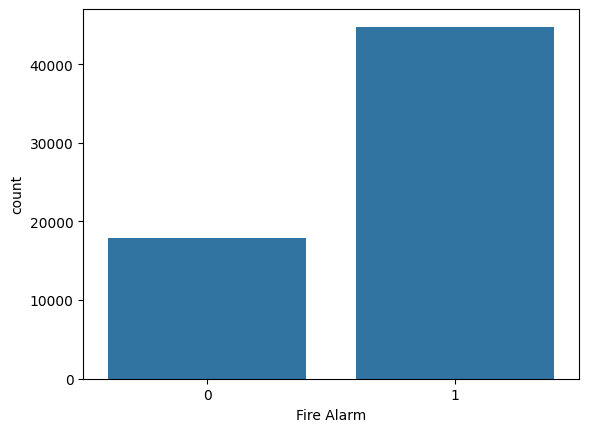

In [11]:
sns.countplot(data=df,x='Fire Alarm')

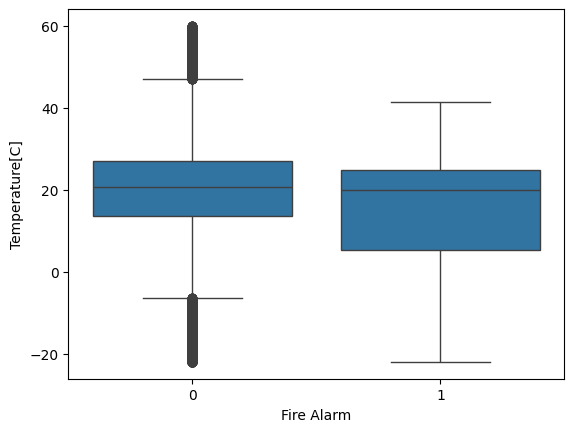

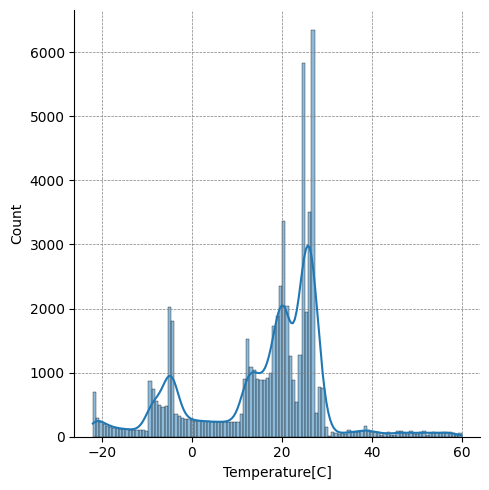

In [68]:
sns.boxplot(x='Fire Alarm', y='Temperature[C]', data=df)
plt.show()

sns.displot(df['Temperature[C]'], kde =True)
plt.grid(color = 'grey',linestyle = '--', linewidth = 0.5)

In [13]:
chest_count=df['TVOC[ppb]'].value_counts(bins=[0,500,3000,10000])
print(chest_count)

(500.0, 3000.0]      32759
(-0.001, 500.0]      27467
(3000.0, 10000.0]      674
Name: count, dtype: int64


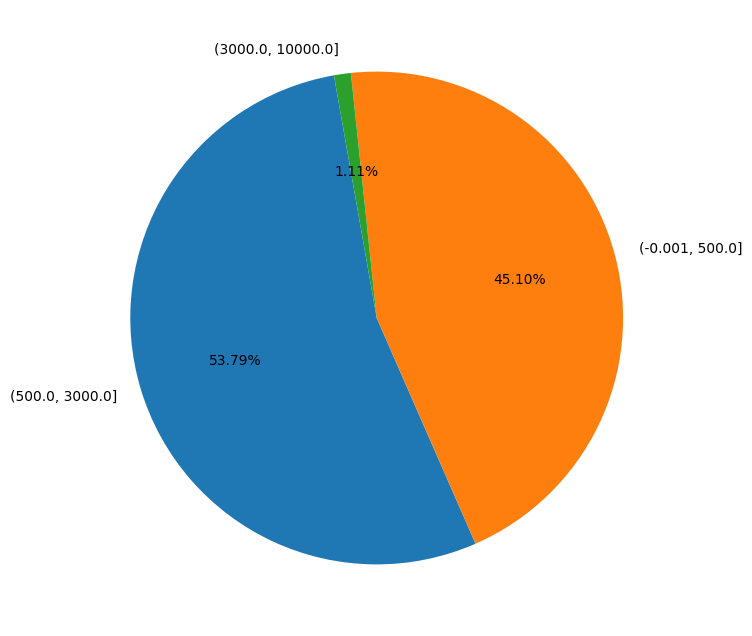

In [14]:
plt.figure(figsize=(16, 8))
plt.pie(chest_count, labels=chest_count.index, autopct='%1.2f%%', startangle=100)
plt.show()

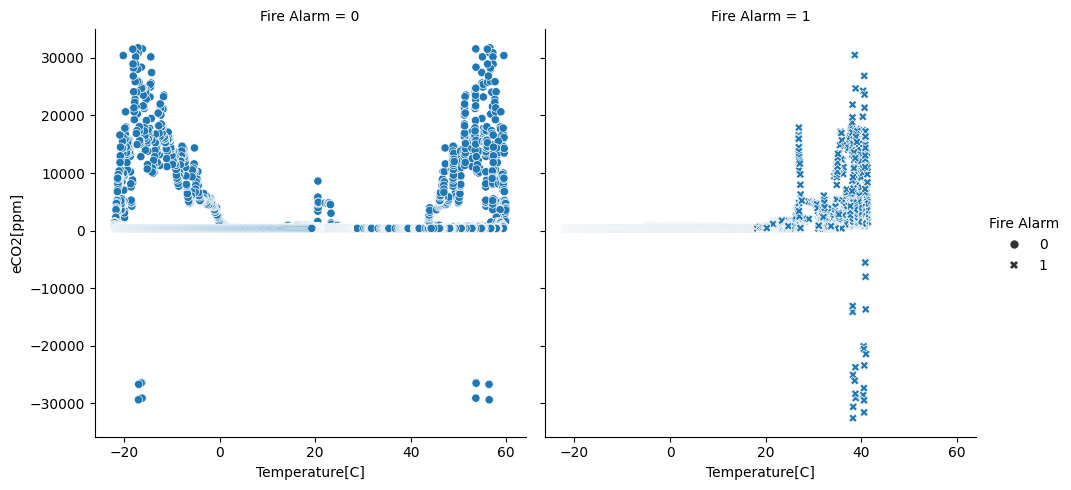

In [73]:

sns.relplot(data=df,x='Temperature[C]',y='eCO2[ppm]',kind='scatter',col='Fire Alarm',style='Fire Alarm')

plt.savefig('TemperatureAndeCO2Fire Alarm.png')

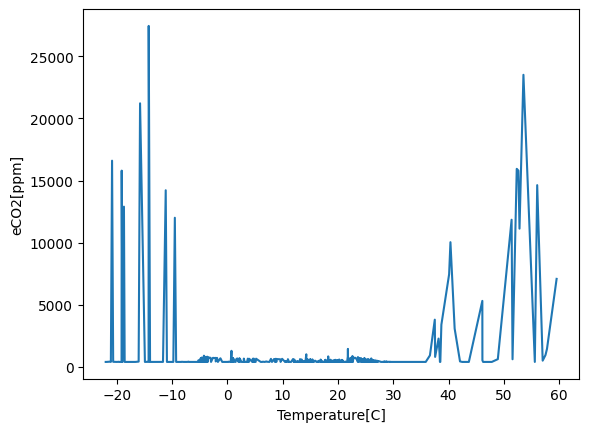

In [63]:
sns.lineplot(data=df.sample(n=1000,replace=False),x='Temperature[C]',y='eCO2[ppm]')
plt.savefig('TemperatureAndeCO2.png')

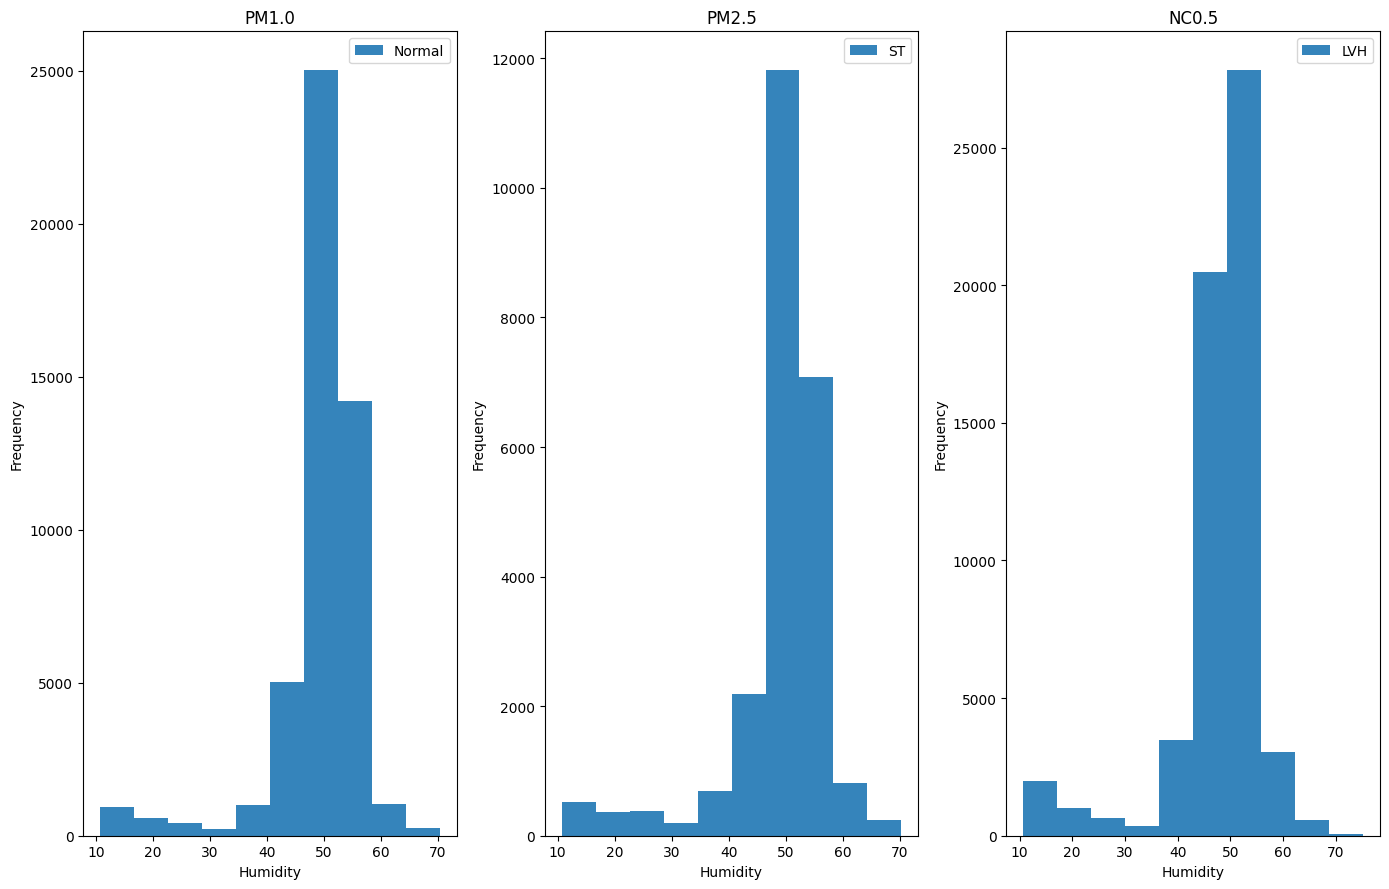

<Figure size 640x480 with 0 Axes>

In [61]:
normal_age = df[df['PM1.0'] > 1]['Humidity[%]']
st_age = df[df['PM2.5'] >2]['Humidity[%]']
lvh_age = df[df['NC0.5'] > 2]['Humidity[%]']

plt.figure(figsize=(14, 9))  

plt.subplot(1, 3, 1)
plt.hist(normal_age, bins=10, alpha=0.9, label='Normal')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('PM1.0')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(st_age, bins=10, alpha=0.9, label='ST')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('PM2.5')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(lvh_age, bins=10, alpha=0.9, label='LVH')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('NC0.5')
plt.legend()

plt.tight_layout()
plt.show()
plt.savefig('HumidityAndPM.png')

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
le=LabelEncoder()
df=df.iloc[:,1:]
df

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [19]:
x=df.drop(columns='Fire Alarm')
y=df['Fire Alarm']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.7)

In [54]:
model_svm = SVC(kernel = 'sigmoid', random_state = 0)
model_svm.fit(X_train, y_train)

SVC(kernel='sigmoid', random_state=0)

In [55]:
y_pred = model_svm.predict(X_test)

[[ 9006  3595]
 [ 3266 27974]]


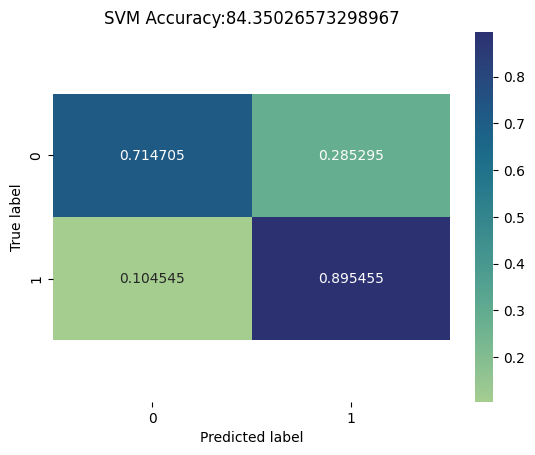

In [56]:
conf_matrix_svm = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)
cm_normalized = conf_matrix_svm.astype('float') / conf_matrix_svm.sum(axis=1)[:, np.newaxis]

ax= sns.heatmap(cm_normalized, annot=True, fmt='g',cmap="crest")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("SVM Accuracy:" + str(model_svm.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('SVMconfusion_matrix.png')

In [23]:
accuracy_svm = accuracy_score(y_test, y_pred)
print(accuracy_svm)

0.5381492210487899


In [24]:
classification_rep_svm = classification_report(y_test, y_pred)
print(classification_rep_svm)

              precision    recall  f1-score   support

           0       0.19      0.18      0.18     12601
           1       0.67      0.68      0.68     31240

    accuracy                           0.54     43841
   macro avg       0.43      0.43      0.43     43841
weighted avg       0.53      0.54      0.54     43841



In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9995894254236901
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12601
           1       1.00      1.00      1.00     31240

    accuracy                           1.00     43841
   macro avg       1.00      1.00      1.00     43841
weighted avg       1.00      1.00      1.00     43841

[[12585    16]
 [    2 31238]]


[[9.98650901e-01 1.34909928e-03]
 [6.40204866e-05 9.99935980e-01]]


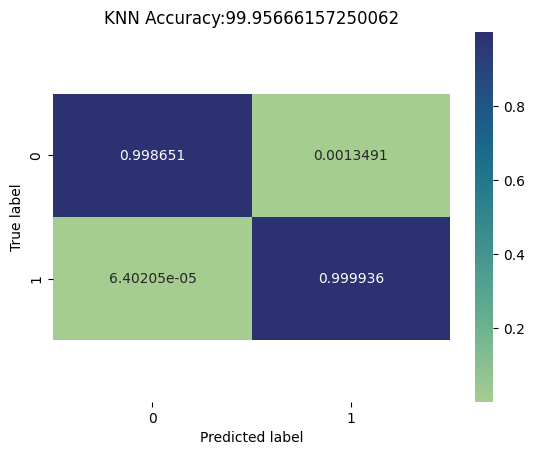

In [47]:
cm_normalized = confusion_matrix(y_test, y_pred).astype('float') / confusion_matrix(y_test, y_pred).sum(axis=1)[:, np.newaxis]
print(cm_normalized)
ax= sns.heatmap(cm_normalized, annot=True, fmt='g',cmap="crest")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("KNN Accuracy:" + str(knn.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('KNNconfusion_matrix.png')

The optimal number of neighbors is 5
The optimal score is 1.00


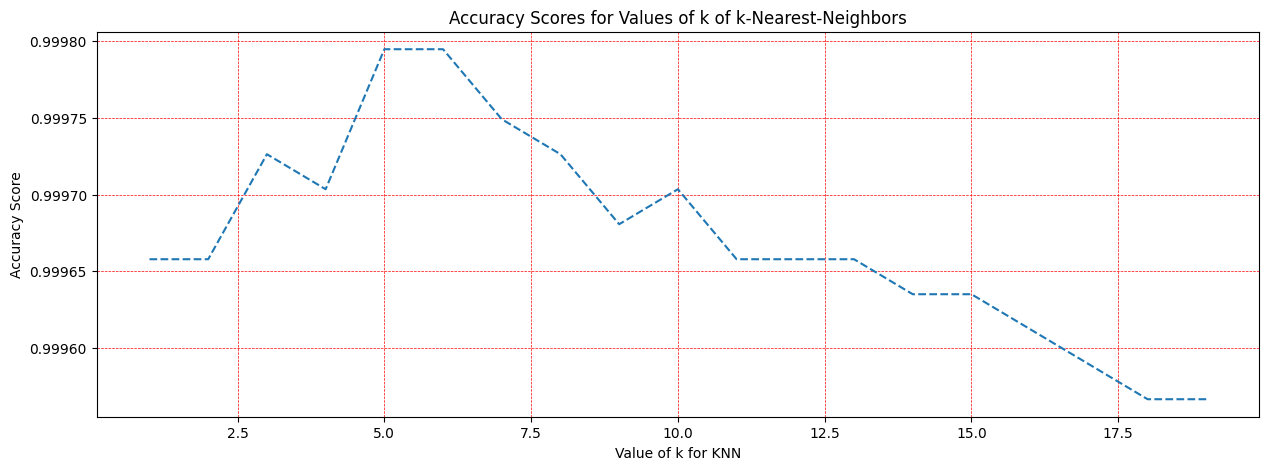

<Figure size 640x480 with 0 Axes>

In [46]:
from sklearn import metrics
scores=[]
# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # input the train data to train KNN
 knn.fit(X_train,y_train)
 # see KNN prediction by inputting the test data
 y_pred=knn.predict(X_test)
 # append the performance metric (accuracy)
 scores.append(metrics.accuracy_score(y_test,y_pred))
 optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(15,5))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.grid(color = 'r',linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('Accuracy Scores for Values of k of k-Nearest-Neighbors.png')

The optimal number of neighbors is 1
The optimal score is 1.00
[0.9989356 1.        0.9989356 0.9994678 0.9994678 0.9989356 0.9989356
 1.        0.9994678 1.       ]


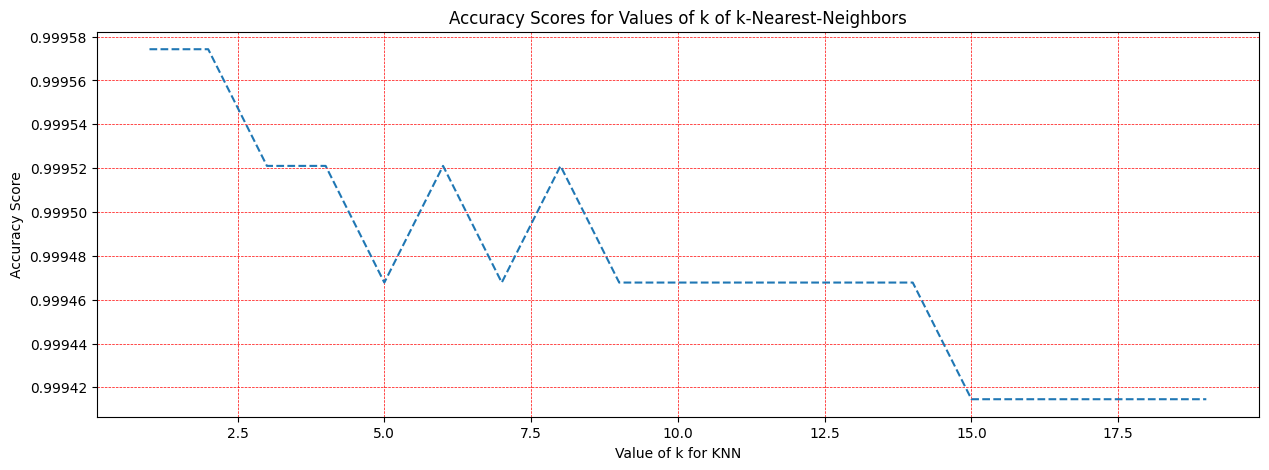

<Figure size 640x480 with 0 Axes>

In [45]:
from sklearn.model_selection import cross_val_score
scores=[]
# We try different values of k for the KNN (from k=1 up to k=26)
lrange=list(range(1,20))
# loop the KNN process
for k in lrange:
 # input the k value and 'distance' measure
 knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
 # get score for the 10 fold cross validation
 score = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
 scores.append(score.mean())
optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(15,5))
print(score)
# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.grid(color = 'r',linestyle = '--', linewidth = 0.5)
plt.show()
plt.savefig('cross_val_score k-Nearest-Neighbors.png')

[[12586    15]
 [    4 31236]]
[[9.98809618e-01 1.19038172e-03]
 [1.28040973e-04 9.99871959e-01]]
dtscore.mean()= 0.9996274614156466


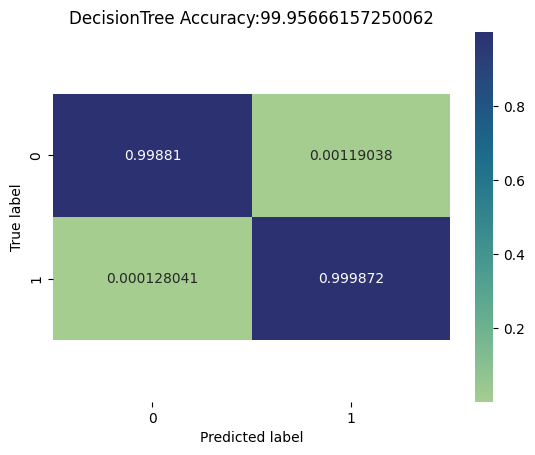

In [42]:
from sklearn.tree import DecisionTreeClassifier
scores=[]
# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,20))
# loop the KNN process

 # input the k value and 'distance' measure
dt=DecisionTreeClassifier(random_state=0,criterion="log_loss")
 # input the train data to train KNN
dt.fit(X_train,y_train)
 # see KNN prediction by inputting the test data
y_pred=dt.predict(X_test)

conf_matrix_dt = confusion_matrix(y_test, y_pred)
print(conf_matrix_svm)
cm_normalized = conf_matrix_dt.astype('float') / conf_matrix_dt.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
ax= sns.heatmap(cm_normalized, annot=True, fmt='g',cmap="crest")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("DecisionTree Accuracy:" + str(dt.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('DecisionTreeconf_matrix.png')
score = cross_val_score(dt, X_train, y_train, cv=10, scoring='accuracy')
print("dtscore.mean()=",score.mean())


[[ 4259  8342]
 [  792 30448]]
[[0.33798905 0.66201095]
 [0.02535211 0.97464789]]
score.mean()= 0.7955717614279456


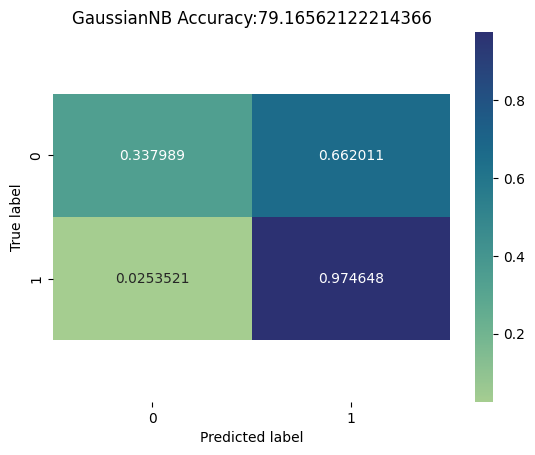

In [43]:
from sklearn.naive_bayes import GaussianNB

# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,20))
# loop the KNN process

 # input the k value and 'distance' measure
gnb=GaussianNB()
 # input the train data to train KNN
gnb.fit(X_train,y_train)
 # see KNN prediction by inputting the test data
y_pred=gnb.predict(X_test)

conf_matrix_gnb = confusion_matrix(y_test, y_pred)
print(conf_matrix_gnb)
cm_normalized = conf_matrix_gnb.astype('float') / conf_matrix_gnb.sum(axis=1)[:, np.newaxis]
print(cm_normalized)
ax= sns.heatmap(cm_normalized, annot=True, fmt='g',cmap="crest")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("GaussianNB Accuracy:" + str(gnb.score(X_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
score = cross_val_score(gnb, X_train, y_train, cv=10, scoring='accuracy')
print("score.mean()=",score.mean())
plt.savefig('gnbconf_matrix.png')